In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin
from kdelearn.metrics import pi_kf

from sklearn.neighbors import NearestNeighbors

Weźmy 4000 elementów z rozkładu DWUWYMIAROWEGO N(0,1) i m elementów z rozkładu N(0,25) (25 to wariancja, odchylenie 5). Znajdźmy podział optymalny w sensie naszego wskaźnika dla m po kolei 0, 40, 80, 200, 400, 800, 2000, 4000.

Siatka dla r: (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

Ustalone k=10

\newpage

m_noise=0
Wynik podstawowy przy r=0.05, k=10


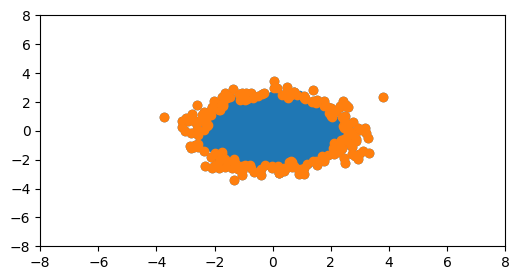

Wskaźnik jakości: 0.414856
Liczba nietypowych elementów: 200/4000 (5.000%)

Wynik po optymalizacji


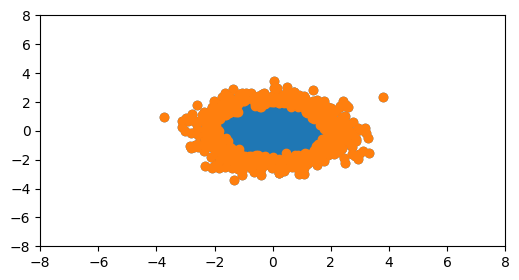

Najlepsze r 0.15
Wskaźnik jakości: 0.363255
Liczba nietypowych elementów: 600/4000 (15.000%)

m_noise=40
Wynik podstawowy przy r=0.05, k=10


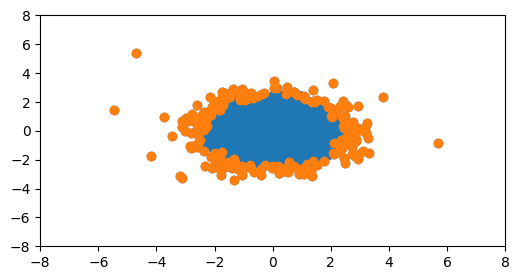

Wskaźnik jakości: 0.390955
Liczba nietypowych elementów: 202/4040 (5.000%)

Wynik po optymalizacji


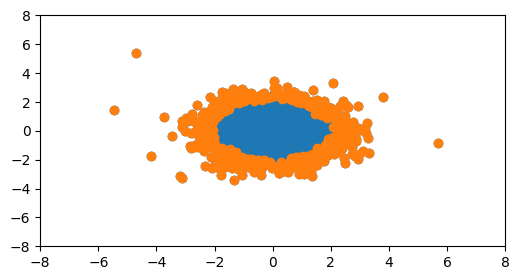

Najlepsze r 0.10
Wskaźnik jakości: 0.348978
Liczba nietypowych elementów: 404/4040 (10.000%)

m_noise=80
Wynik podstawowy przy r=0.05, k=10


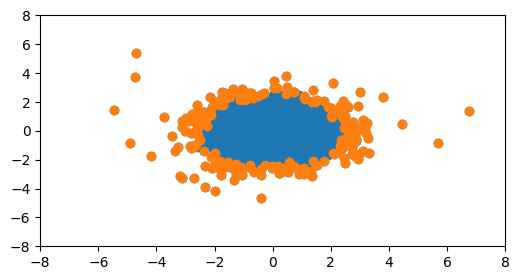

Wskaźnik jakości: 0.371678
Liczba nietypowych elementów: 204/4080 (5.000%)

Wynik po optymalizacji


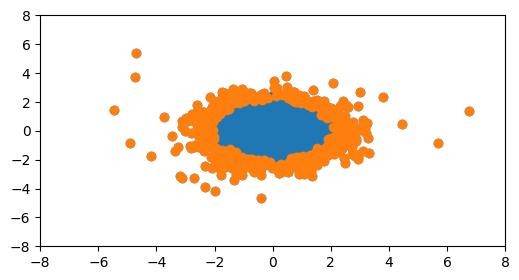

Najlepsze r 0.10
Wskaźnik jakości: 0.337318
Liczba nietypowych elementów: 408/4080 (10.000%)

m_noise=200
Wynik podstawowy przy r=0.05, k=10


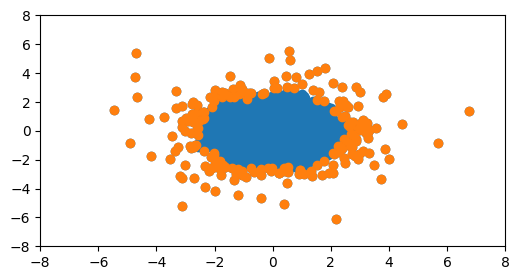

Wskaźnik jakości: 0.337225
Liczba nietypowych elementów: 210/4200 (5.000%)

Wynik po optymalizacji


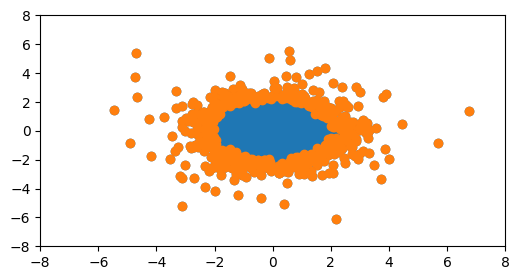

Najlepsze r 0.12
Wskaźnik jakości: 0.306740
Liczba nietypowych elementów: 504/4200 (12.000%)

m_noise=400
Wynik podstawowy przy r=0.05, k=10


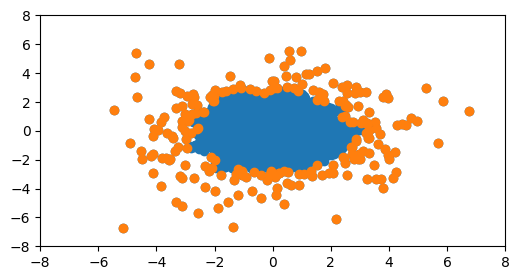

Wskaźnik jakości: 0.304892
Liczba nietypowych elementów: 220/4400 (5.000%)

Wynik po optymalizacji


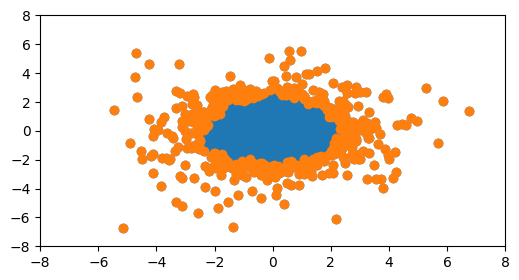

Najlepsze r 0.10
Wskaźnik jakości: 0.271181
Liczba nietypowych elementów: 440/4400 (10.000%)

m_noise=800
Wynik podstawowy przy r=0.05, k=10


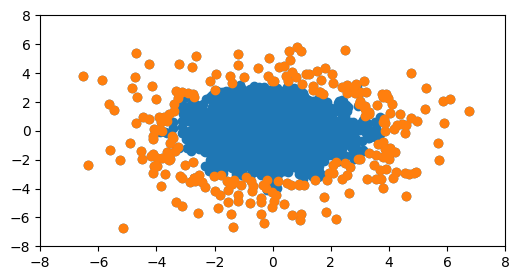

Wskaźnik jakości: 0.371496
Liczba nietypowych elementów: 240/4800 (5.000%)

Wynik po optymalizacji


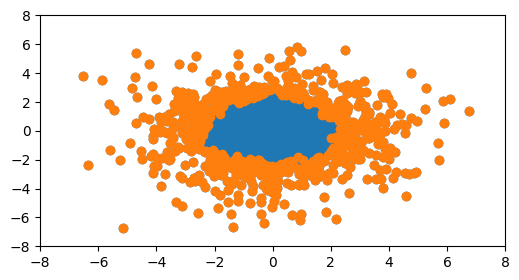

Najlepsze r 0.14
Wskaźnik jakości: 0.230564
Liczba nietypowych elementów: 672/4800 (14.000%)

m_noise=2000
Wynik podstawowy przy r=0.05, k=10


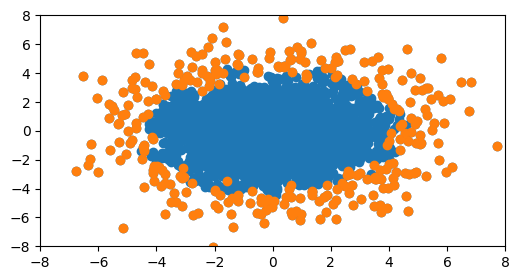

Wskaźnik jakości: 0.432484
Liczba nietypowych elementów: 300/6000 (5.000%)

Wynik po optymalizacji


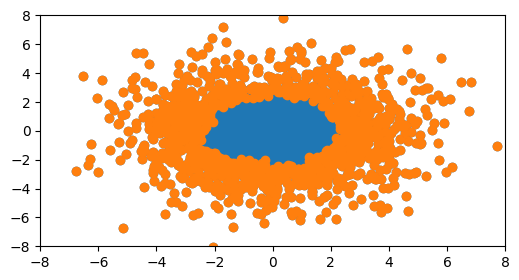

Najlepsze r 0.20
Wskaźnik jakości: 0.212592
Liczba nietypowych elementów: 1200/6000 (20.000%)

m_noise=4000
Wynik podstawowy przy r=0.05, k=10


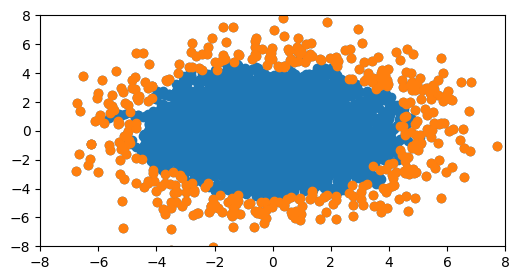

Wskaźnik jakości: 0.392094
Liczba nietypowych elementów: 400/8000 (5.000%)

Wynik po optymalizacji


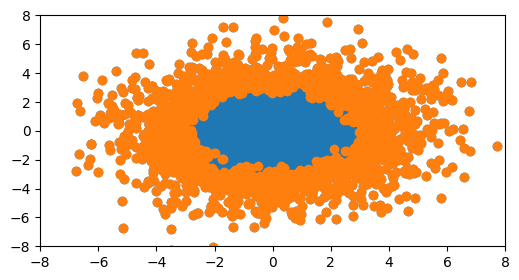

Najlepsze r 0.20
Wskaźnik jakości: 0.268846
Liczba nietypowych elementów: 1600/8000 (20.000%)



In [2]:
# n = 2
m_train1 = 4000
    
r_grid = (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,
          0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2)

for m_noise in [0, 40, 80, 200, 400, 800, 2000, 4000]:
    np.random.seed(0)
    print(f"{m_noise=:}")
    print("Wynik podstawowy przy r=0.05, k=10")

    # Data
    x_train1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=(m_train1,))
    x_train2 = np.random.multivariate_normal([0, 0], [[5, 0], [0, 5]], size=(m_noise,))
    x_train = np.concatenate((x_train1, x_train2))
    m_train = x_train.shape[0]

    bandwidth = direct_plugin(x_train)

    # Outliers detection
    k = 10  # int(np.sqrt(m_train))
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
    distances, indices = nbrs.kneighbors(x_train)
    dist_k = np.max(distances, axis=1)
    r = 0.05
    threshold = np.quantile(dist_k, 1 - r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)
    metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 1])
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1])
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.show()
    
    print(f"Wskaźnik jakości: {metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
    # Dopasowanie parametrów na siatce
    print("Wynik po optymalizacji")
    
    best_metric = np.inf
    for r in r_grid:
        k = int(np.sqrt(m_train))
#         nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
#         distances, indices = nbrs.kneighbors(x_train)
#         dist_k = np.max(distances, axis=1)
        threshold = np.quantile(dist_k, 1 - r)
        labels_pred = np.where(dist_k >= threshold, 1 ,0)
        metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
        if metric < best_metric:
            best_r = r
            best_metric = metric

    # Outliers detection
    k = int(np.sqrt(m_train))
#     nbrs = NearestNeighbors(n_neighbors=k, algorithm='brute').fit(x_train)
#     distances, indices = nbrs.kneighbors(x_train)
#     dist_k = np.max(distances, axis=1)
    threshold = np.quantile(dist_k, 1 - best_r)
    labels_pred = np.where(dist_k >= threshold, 1 ,0)

    # Plot
    plt.figure(figsize=(6, 3))
    plt.scatter(x_train[:, 0], x_train[:, 1])
    plt.scatter(x_train[labels_pred==1, 0], x_train[labels_pred==1, 1])
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)
    plt.show()

    print(f"Najlepsze r {best_r:.2f}")
    print(f"Wskaźnik jakości: {best_metric:.6f}")
    print(f"Liczba nietypowych elementów: {labels_pred.sum()}/{m_train1+m_noise} ({100 * labels_pred.sum()/(m_train1+m_noise):.3f}%)\n")
    
#     print("-" * 30)